<a href="https://colab.research.google.com/github/Alberto-San/ExperimentosMonografia/blob/main/LOF_Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!git clone https://github.com/Alberto-San/MonografiaDataScience
import os
import sys
import warnings
warnings.filterwarnings('ignore')

# def cd_into(folder):
#   sys.path.append(os.path.abspath(os.path.join(os.path.dirname("."), folder)))


# cd_into("MonografiaDataScience/DownloadAPI")

# from download_api import *

# dataset_name = "prahladmehandiratta/cervical-cancer-largest-dataset-sipakmed"
# kaggle_key = '{"username":"daniellpez2","key":"d2901f7891215e2c88e8defcd26c7c8c"}'
# dst_folder = "sipakmed"

# downloader = DownloadDataset(dataset_name, kaggle_key, dst_folder)
# measure_time(downloader.download)

fatal: destination path 'MonografiaDataScience' already exists and is not an empty directory.


In [17]:
!pip install umap-learn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=d71d95a95ec890ec099c16803e0e6b9f2583bec07f06c9180770b677326fbcaa
  Stored in directory: /root/.cache/pip/wheels/f4/3e/1c/596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55509 sha256=881eb3c1352c5ab0d3a50fa3237519a405d1dfa310d17440366ddde4d3d5aec8
  Stored in directory: /root/.cache/pip/wheels/b9/89/cc/59ab91ef5b21dc2ab3635528d7d227f49dfc9169905dcb959d
Successfully built umap-learn pynndescent


lof model for label im_Superficial-Intermediate was saved to MonografiaDataScience/tmp/lof_im_Superficial-Intermediate.joblib
lof model for label im_Superficial-Intermediate was saved to MonografiaDataScience/tmp/lof_im_Superficial-Intermediate.joblib
Outliers of im_Superficial-Intermediate is located at MonografiaDataScience/tmp/lof_im_Superficial-Intermediate.csv
lof model for label im_Dyskeratotic was saved to MonografiaDataScience/tmp/lof_im_Dyskeratotic.joblib
lof model for label im_Dyskeratotic was saved to MonografiaDataScience/tmp/lof_im_Dyskeratotic.joblib
Outliers of im_Dyskeratotic is located at MonografiaDataScience/tmp/lof_im_Dyskeratotic.csv
lof model for label im_Parabasal was saved to MonografiaDataScience/tmp/lof_im_Parabasal.joblib
lof model for label im_Parabasal was saved to MonografiaDataScience/tmp/lof_im_Parabasal.joblib
Outliers of im_Parabasal is located at MonografiaDataScience/tmp/lof_im_Parabasal.csv
lof model for label im_Metaplastic was saved to Monografia

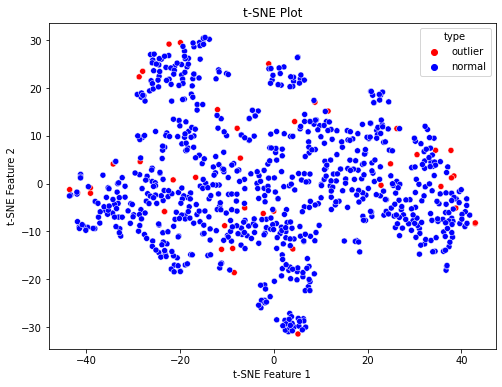

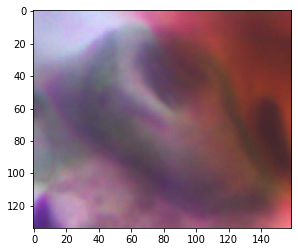

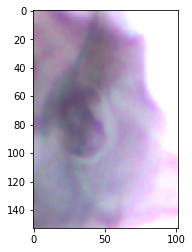

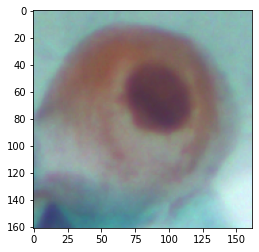

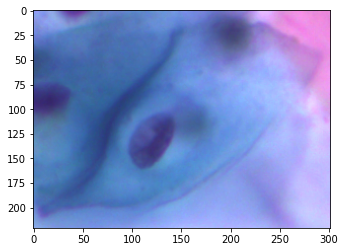

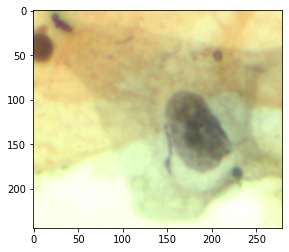

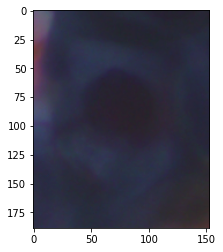

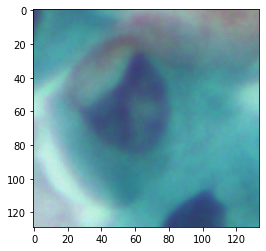

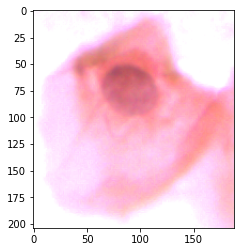

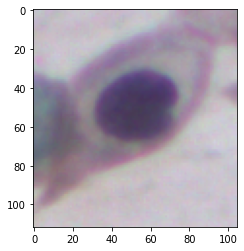

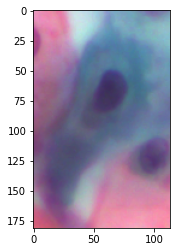

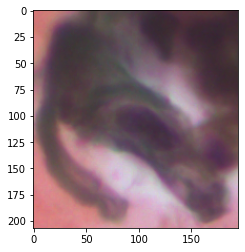

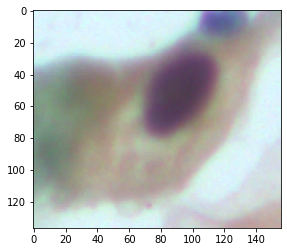

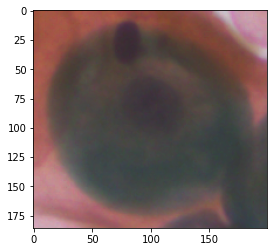

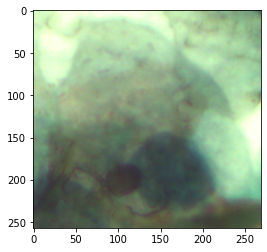

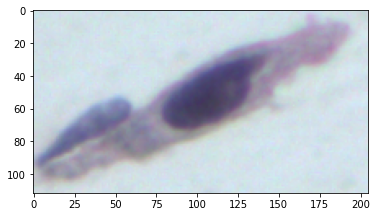

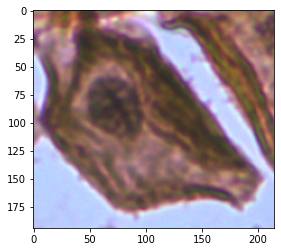

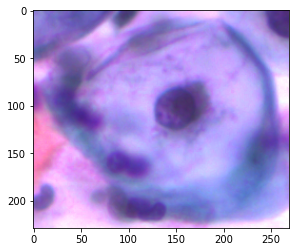

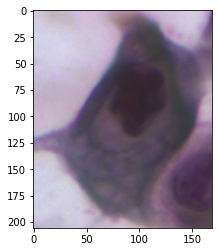

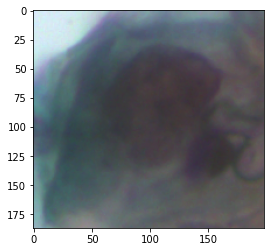

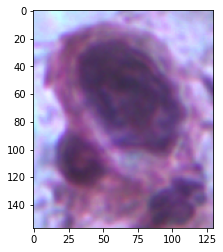

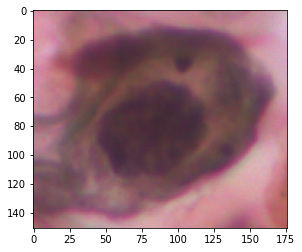

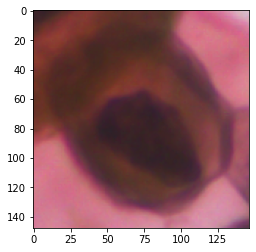

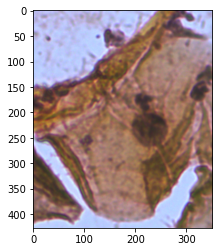

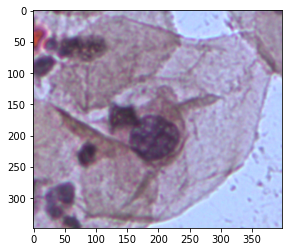

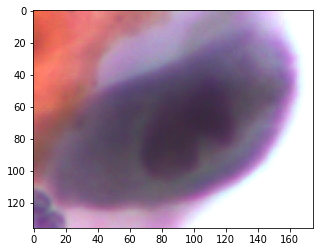

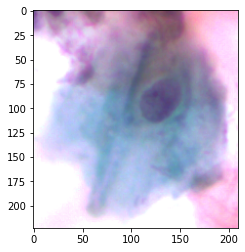

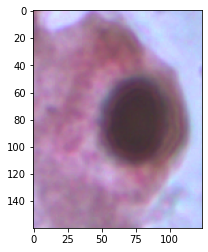

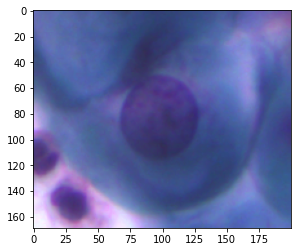

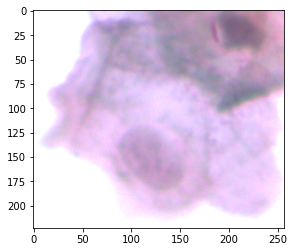

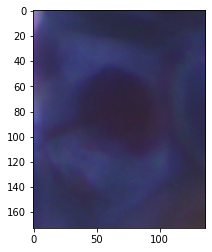

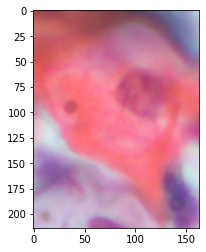

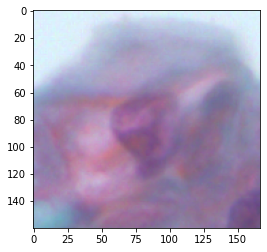

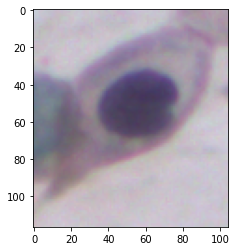

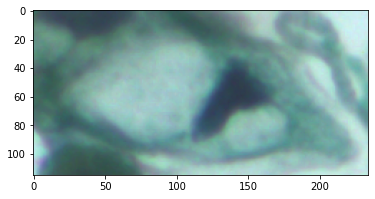

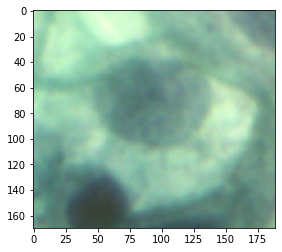

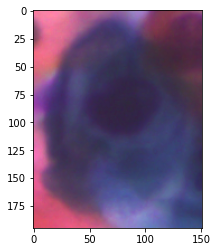

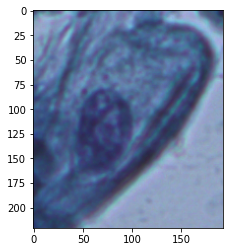

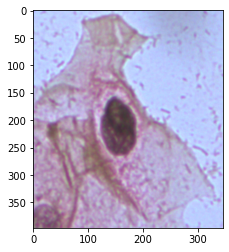

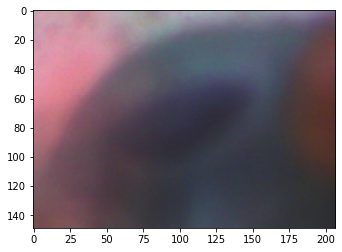

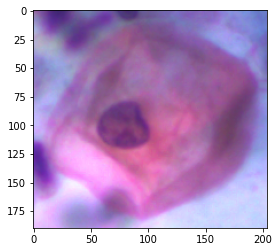

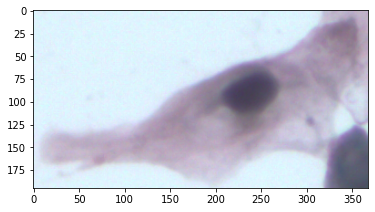

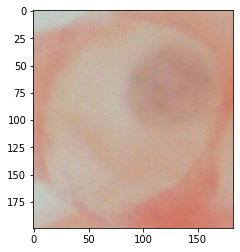

[(<matplotlib.image.AxesImage at 0x7efdcc1ecc10>, None),
 (<matplotlib.image.AxesImage at 0x7efde29f08e0>, None),
 (<matplotlib.image.AxesImage at 0x7efde3ef02b0>, None),
 (<matplotlib.image.AxesImage at 0x7efde3e80040>, None),
 (<matplotlib.image.AxesImage at 0x7efde3d1a910>, None),
 (<matplotlib.image.AxesImage at 0x7efde3d88520>, None),
 (<matplotlib.image.AxesImage at 0x7efde3c4d700>, None),
 (<matplotlib.image.AxesImage at 0x7efde2eae760>, None),
 (<matplotlib.image.AxesImage at 0x7efdd3a27d30>, None),
 (<matplotlib.image.AxesImage at 0x7efdcc16fee0>, None),
 (<matplotlib.image.AxesImage at 0x7efde29c6940>, None),
 (<matplotlib.image.AxesImage at 0x7efde3d8c1f0>, None),
 (<matplotlib.image.AxesImage at 0x7efdd3bfe640>, None),
 (<matplotlib.image.AxesImage at 0x7efde386bc40>, None),
 (<matplotlib.image.AxesImage at 0x7efdcc194af0>, None),
 (<matplotlib.image.AxesImage at 0x7efde3e8bf70>, None),
 (<matplotlib.image.AxesImage at 0x7efde3f4caf0>, None),
 (<matplotlib.image.AxesImage a

In [11]:
path_color_images = "./MonografiaDataScience/tmp/color_statistics.csv"
class_label = "class"
path_label = "image_path"

from MonografiaDataScience.PreprocessorAPI.getOutliersLOF import *

run_outliers_analisis(path_csv=path_color_images, class_field=class_label, path_field=path_label)


import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
import seaborn as sns
from umap import UMAP


def umap_plot(df):
    # Separate features and labels
    X = df.drop('type', axis=1)
    y = df['type'].apply(lambda value: 1. if value == "normal" else 2.)
    
    # Perform UMAP
    umap = UMAP(n_components=2, random_state=42)
    X_umap = umap.fit_transform(X)
    
    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=y, palette='coolwarm')
    plt.title('UMAP Plot')
    plt.xlabel('UMAP Feature 1')
    plt.ylabel('UMAP Feature 2')
    plt.show()


def tsne_plot(df):
    # Separate features and labels
    X = df.drop('type', axis=1)
    y = df['type']
    
    # Perform t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y, palette=['red', 'blue'])
    plt.title('t-SNE Plot')
    plt.xlabel('t-SNE Feature 1')
    plt.ylabel('t-SNE Feature 2')
    plt.show()


def mds_plot(df):
    # Separate features and labels
    X = df.drop('type', axis=1)
    y = df['type'].apply(lambda value: 1. if value == "normal" else 2.)
    
    # Perform MDS
    mds = MDS(n_components=2, random_state=42)
    X_mds = mds.fit_transform(X)
    
    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(X_mds[:,0], X_mds[:,1], c=y, cmap='coolwarm')
    plt.title('MDS Plot')
    plt.xlabel('MDS Feature 1')
    plt.ylabel('MDS Feature 2')
    plt.show()


def plot_normal(df):
    # Separate features and labels
    X = df.drop('type', axis=1)
    y = df['type'].apply(lambda value: 1. if value == "normal" else 2.)
    X_mds = X.values
    
    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(X_mds[:,0], X_mds[:,1], c=y, cmap='coolwarm')
    plt.title('MDS Plot')
    plt.xlabel('MDS Feature 1')
    plt.ylabel('MDS Feature 2')
    plt.show()


def plot_distribution(path):
  table = pd.read_csv(path).drop(["image_path"], axis=1)
  tsne_plot(table)


import cv2

path = "MonografiaDataScience/tmp/lof_im_Koilocytotic.csv"
plot_distribution(path)

map = lambda list_, op: [op(elem) for elem in list_]
read_im = lambda path: cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
plot_im = lambda path: (plt.imshow( read_im(path) ), plt.show())
filter = lambda condition, table: table[condition]

table = pd.read_csv(path)
im = filter(table["type"] == "outlier", table)["image_path"].values

map(im, plot_im)